In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv(r"C:\Users\RITIKA\Downloads\archive\Churn_Modelling.csv")
data.head(5)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1        1.0             1.0   
1       1   83807.86              1        0.0             1.0   
2       8  159660.80              3        1.0             0.0   
3       1       0.00              2        0.0             0.0   
4       2  125510.82              1        NaN             1.0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [10]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [16]:
for column in data.columns:
    if len(data[column].unique()) < 20:
        print("Column: ",column , "\tUnique Values : ",data[column].unique())
    else:
        pass

Column:  Geography 	Unique Values :  ['France' 'Spain' nan 'Germany']
Column:  Gender 	Unique Values :  ['Female' 'Male']
Column:  Tenure 	Unique Values :  [ 2  1  8  7  4  6  3 10  5  9  0]
Column:  NumOfProducts 	Unique Values :  [1 3 2 4]
Column:  HasCrCard 	Unique Values :  [ 1.  0. nan]
Column:  IsActiveMember 	Unique Values :  [ 1.  0. nan]
Column:  Exited 	Unique Values :  [1 0]


In [18]:
for column in data.columns:
    if len(data[column].unique()) > 20:
        print("Column: ",column , 
              "\tUnique Values : ", data[column].unique(),
              "No. of Unique Values:",len(data[column].unique()) ,
              "\t Data type : ",data[column].dtypes)
        print("\n")
    else:
        pass

Column:  RowNumber 	Unique Values :  [    1     2     3 ...  9998  9999 10000] No. of Unique Values: 10000 	 Data type :  int64


Column:  CustomerId 	Unique Values :  [15634602 15647311 15619304 ... 15584532 15682355 15628319] No. of Unique Values: 10000 	 Data type :  int64


Column:  Surname 	Unique Values :  ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge'] No. of Unique Values: 2932 	 Data type :  object


Column:  CreditScore 	Unique Values :  [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631

In [46]:
data["CreditScore"] = pd.to_numeric(data["CreditScore"],errors="coerce")
data["CreditScore"].dtypes

dtype('int64')

In [48]:
temp = (data.isnull().sum() / data.shape[0] ) * 100
temp

RowNumber              0.000000
CustomerId             0.000000
Surname                0.000000
CreditScore            0.000000
Geography              0.009998
Gender                 0.000000
Age                    0.009998
Tenure                 0.000000
Balance                0.000000
NumOfProducts          0.000000
HasCrCard              0.009998
IsActiveMember         0.009998
EstimatedSalary        0.000000
Exited                 0.000000
New_Balance            0.000000
New_EstimatedSalary    0.000000
dtype: float64

<Axes: xlabel='CreditScore', ylabel='Density'>

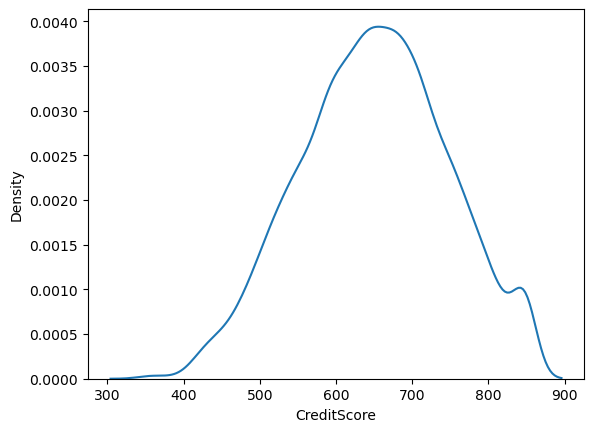

In [50]:
sns.kdeplot(data=data, x="CreditScore")

In [52]:
data["New_CreditScore"] = data["CreditScore"].copy()


In [54]:
data["New_CreditScore"].mean()

650.5550889822035

In [56]:
data["New_CreditScore"] =data["New_CreditScore"].fillna(data["New_CreditScore"].mean())

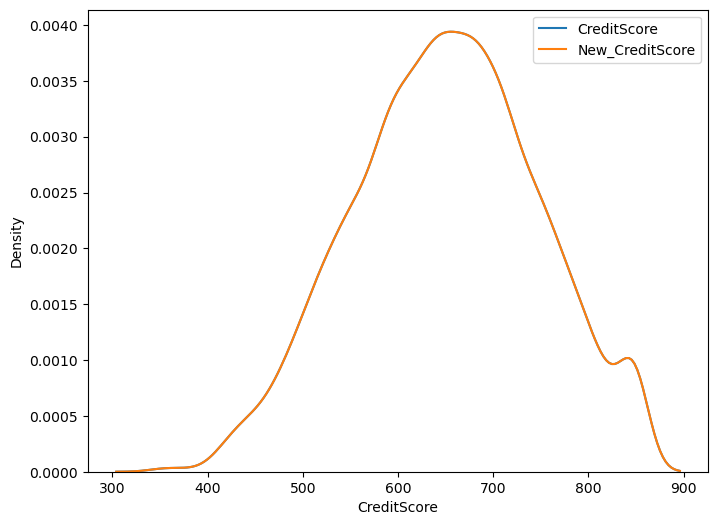

In [58]:
plt.figure(figsize=(8, 6))

sns.kdeplot(data['CreditScore'], label='CreditScore')

sns.kdeplot(data['New_CreditScore'], label='New_CreditScore')

plt.legend()

In [62]:
data["CreditScore"] =data["CreditScore"].fillna(data["CreditScore"].mean())
data.head()


RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1        1.0             1.0   
1       1   83807.86              1        0.0             1.0   
2       8  159660.80              3        1.0             0.0   
3       1       0.00              2        0.0             0.0   
4       2  125510.82              1        NaN             1.0   

   EstimatedSalary  Exited  New_Balance  New_EstimatedSalary  New_CreditScore  
0        101348.88       1         0.00            101348.88              619  
1        112542.58       0     83807.86            112542.58              608  
2        113931.57       1    159660.80            113931.57              502  
3         93826.63       0         0.00             93826.63              699  
4         79084.10       0    125510.82             79084.10              850

In [64]:
data = data.drop(columns=["New_CreditScore",'CustomerId'],axis=1)
data

RowNumber    Surname  CreditScore Geography  Gender   Age  Tenure  \
0              1   Hargrave          619    France  Female  42.0       2   
1              2       Hill          608     Spain  Female  41.0       1   
2              3       Onio          502    France  Female  42.0       8   
3              4       Boni          699    France  Female  39.0       1   
4              5   Mitchell          850     Spain  Female  43.0       2   
...          ...        ...          ...       ...     ...   ...     ...   
9997        9998        Liu          709    France  Female  36.0       7   
9998        9999  Sabbatini          772   Germany    Male  42.0       3   
9999        9999  Sabbatini          772   Germany    Male  42.0       3   
10000      10000     Walker          792    France  Female  28.0       4   
10001      10000     Walker          792    France  Female  28.0       4   

         Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0           0.00              1        1.0             1.0        101348.88   
1       83807.86              1        0.0             1.0        112542.58   
2      159660.80              3        1.0             0.0        113931.57   
3           0.00              2        0.0             0.0         93826.63   
4      125510.82              1        NaN             1.0         79084.10   
...          ...            ...        ...             ...              ...   
9997        0.00              1        0.0             1.0         42085.58   
9998    75075.31              2        1.0             0.0         92888.52   
9999    75075.31              2        1.0             0.0         92888.52   
10000  130142.79              1        1.0             0.0         38190.78   
10001  130142.79              1        1.0             0.0         38190.78   

       Exited  New_Balance  New_EstimatedSalary  
0           1         0.00            101348.88  
1           0     83807.86            112542.58  
2           1    159660.80            113931.57  
3           0         0.00             93826.63  
4           0    125510.82             79084.10  
...       ...          ...                  ...  
9997        1         0.00             42085.58  
9998        1     75075.31             92888.52  
9999        1     75075.31             92888.52  
10000       0    130142.79             38190.78  
10001       0    130142.79             38190.78  

[10002 rows x 15 columns]

In [66]:
categorical_columns = []
numerical_columns = []

for column in data.columns:
    if (data[column].dtypes == "object"):
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)
        
print("categorical_columns : ",categorical_columns)
print("numerical_columns : ",numerical_columns)


categorical_columns :  ['Surname', 'Geography', 'Gender']
numerical_columns :  ['RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'New_Balance', 'New_EstimatedSalary']


In [76]:
if counter < len(categorical_columns):
    print(i, j, counter, categorical_columns[counter])
else:
    print(f"Counter {counter} is out of bounds for categorical_columns with length {len(categorical_columns)}.")

Counter 3 is out of bounds for categorical_columns with length 3.


In [78]:
counter = 0
for i in range(0, 4):
    for j in range(0, 4):
        print(i, j, counter, categorical_columns[counter % len(categorical_columns)])
        counter += 1

0 0 0 Surname
0 1 1 Geography
0 2 2 Gender
0 3 3 Surname
1 0 4 Geography
1 1 5 Gender
1 2 6 Surname
1 3 7 Geography
2 0 8 Gender
2 1 9 Surname
2 2 10 Geography
2 3 11 Gender
3 0 12 Surname
3 1 13 Geography
3 2 14 Gender
3 3 15 Surname


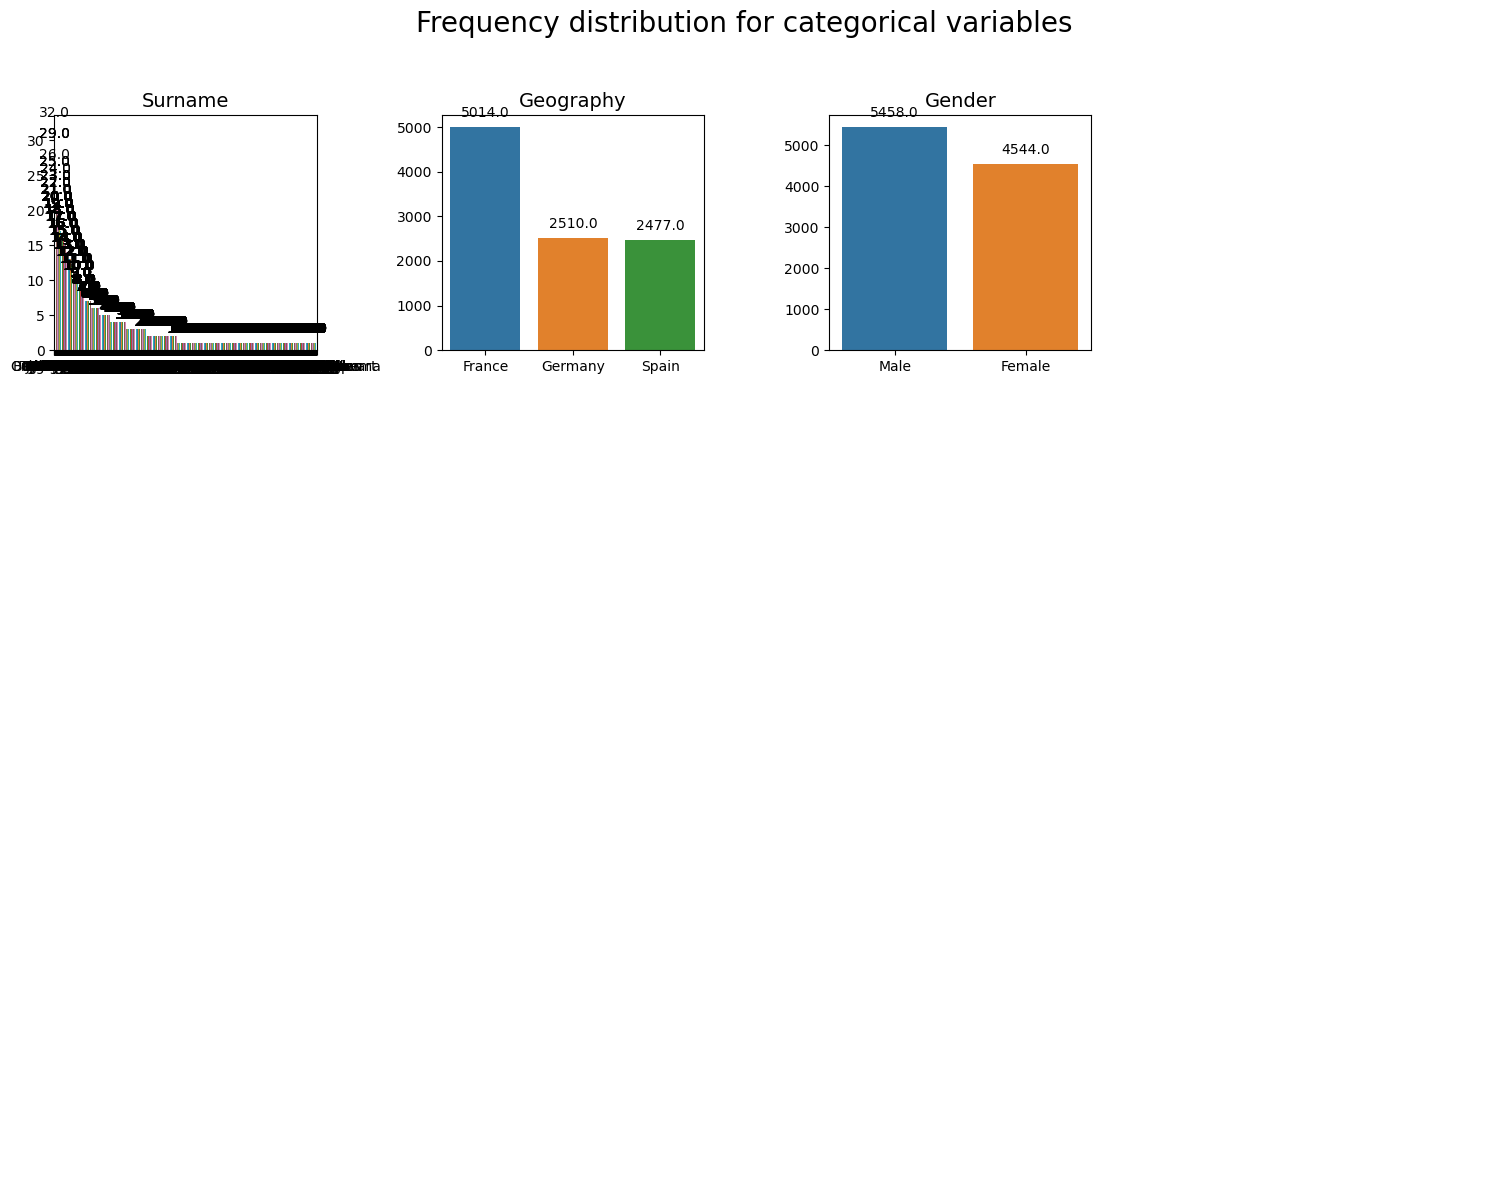

In [94]:
import warnings

warnings.filterwarnings("ignore")

fig, axes = plt.subplots(4, 4, figsize=(15, 12))  
fig.suptitle('Frequency distribution for categorical variables', fontsize=20)

counter = 0
max_columns = len(categorical_columns)  
for i in range(4):
    for j in range(4):
        if counter < max_columns:  
            x = sns.countplot(
                ax=axes[i, j],
                x=categorical_columns[counter],
                order=data[categorical_columns[counter]].value_counts().index,
                palette="tab10",
                data=data
            )
            axes[i, j].set_title(categorical_columns[counter], fontsize=14)
            axes[i, j].set(xlabel=None, ylabel=None)

            for p in x.patches:
                x.annotate(
                    format(p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10), textcoords='offset points'
                )
            counter += 1
        else:
            axes[i, j].axis('off') 
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

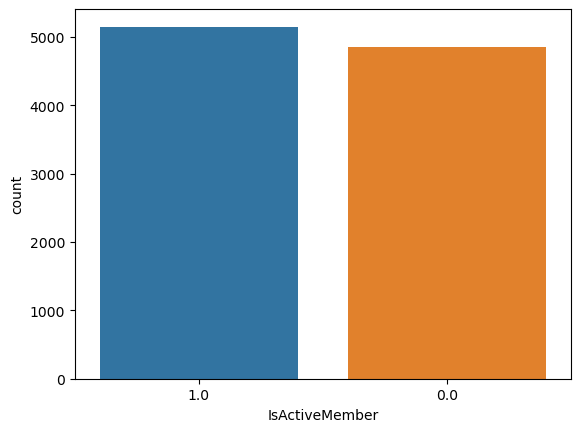

In [100]:
x = sns.countplot(x="IsActiveMember", order = data['IsActiveMember'].value_counts().index, palette="tab10",
                  data=data)

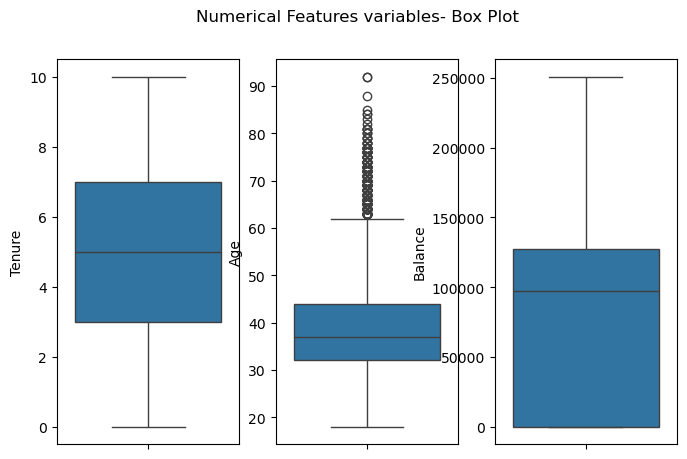

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(8,5))
fig.suptitle('Numerical Features variables- Box Plot')

x = sns.boxplot(ax = axes[0],data=data['Tenure'], palette="tab10")
x = sns.boxplot(ax = axes[1],data=data['Age'], palette="tab10")
x = sns.boxplot(ax = axes[2],data=data['Balance'], palette="tab10")

In [118]:
data.fillna(method='ffill', inplace=True)  # Example of forward fill

In [120]:
data.drop_duplicates(inplace=True)

In [122]:
data['AccountAge'] = data['Tenure']  # Example of creating a new feature

In [124]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)  # One-Hot Encoding

In [112]:
print(data.columns)

Index(['RowNumber', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'New_Balance', 'New_EstimatedSalary'],
      dtype='object')


In [128]:
# Check column names and data shape
print("Columns in DataFrame:", data.columns)
print("DataFrame shape:", data.shape)

# Ensure 'Churn' exists in the DataFrame before plotting
if 'Churn' in data.columns:
    sns.displot(data, x='Tenure', hue='Churn', ax=axes[0])
    sns.displot(data, x='Age', hue='Churn', ax=axes[1])
    sns.displot(data, x='Balance', hue='Churn', ax=axes[2])
else:
    print("Error: 'Churn' column not found in DataFrame.")

Columns in DataFrame: Index(['RowNumber', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'New_Balance', 'New_EstimatedSalary', 'AccountAge',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype='object')
DataFrame shape: (10000, 17)
Error: 'Churn' column not found in DataFrame.


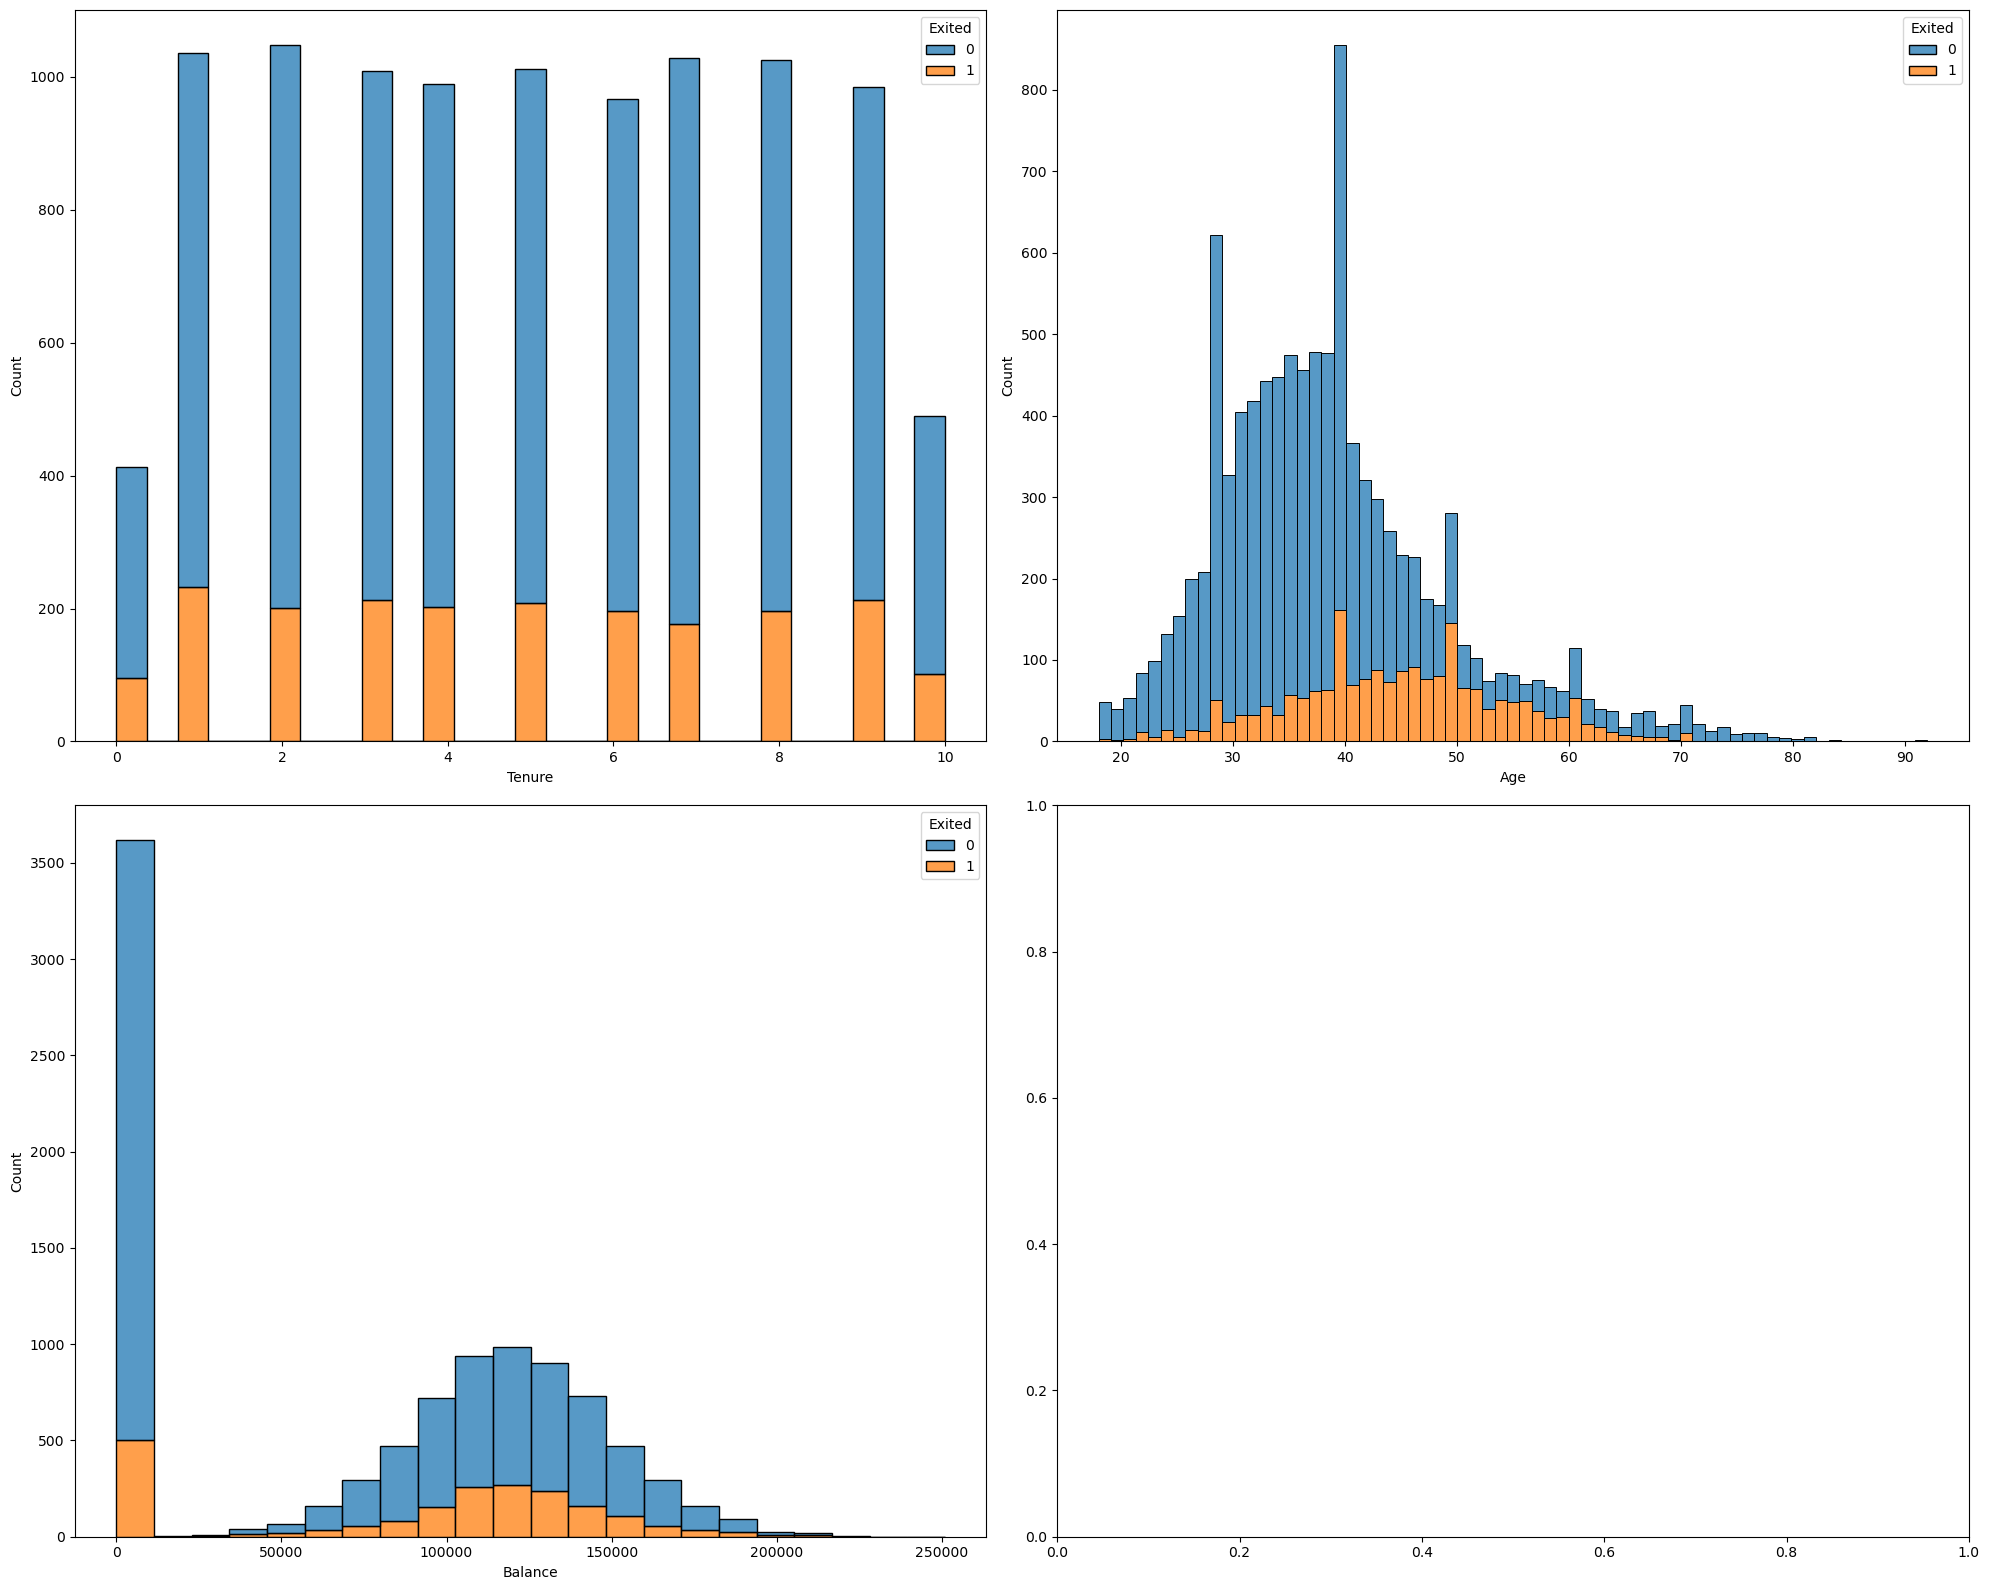

In [136]:
import warnings

warnings.filterwarnings("ignore")


fig, axes = plt.subplots(2, 2, figsize=(20, 16)) 

if 'Exited' in data.columns:
    sns.histplot(data=data, x='Tenure', hue='Exited', ax=axes[0, 0], multiple="stack")
    sns.histplot(data=data, x='Age', hue='Exited', ax=axes[0, 1], multiple="stack")
    sns.histplot(data=data, x='Balance', hue='Exited', ax=axes[1, 0], multiple="stack")
    
else:
    print("Error: 'Exited' column not found in DataFrame.")

plt.tight_layout()
plt.show()

In [138]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == "object":
        print(" Label Encoding,Encoded Column : ",column)
        data[column]= labelencoder.fit_transform(data[column]) 
    else:
        pass
    
data.head()


 Label Encoding,Encoded Column :  Surname


RowNumber  Surname  CreditScore   Age  Tenure    Balance  NumOfProducts  \
0          1     1115          619  42.0       2       0.00              1   
1          2     1177          608  41.0       1   83807.86              1   
2          3     2040          502  42.0       8  159660.80              3   
3          4      289          699  39.0       1       0.00              2   
4          5     1822          850  43.0       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  New_Balance  \
0        1.0             1.0        101348.88       1         0.00   
1        0.0             1.0        112542.58       0     83807.86   
2        1.0             0.0        113931.57       1    159660.80   
3        0.0             0.0         93826.63       0         0.00   
4        0.0             1.0         79084.10       0    125510.82   

   New_EstimatedSalary  AccountAge  Geography_Germany  Geography_Spain  \
0            101348.88           2              False            False   
1            112542.58           1              False             True   
2            113931.57           8              False            False   
3             93826.63           1              False            False   
4             79084.10           2              False             True   

   Gender_Male  
0        False  
1        False  
2        False  
3        False  
4        False

In [142]:
imbalance_check = (data["Exited"].value_counts(normalize=True) ) *100  # Normalize Parameter for Percentage 
imbalance_check

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

In [144]:
correlation_data = data.corr()

Text(0.5, 1.0, 'Class Distribution Heatmap')

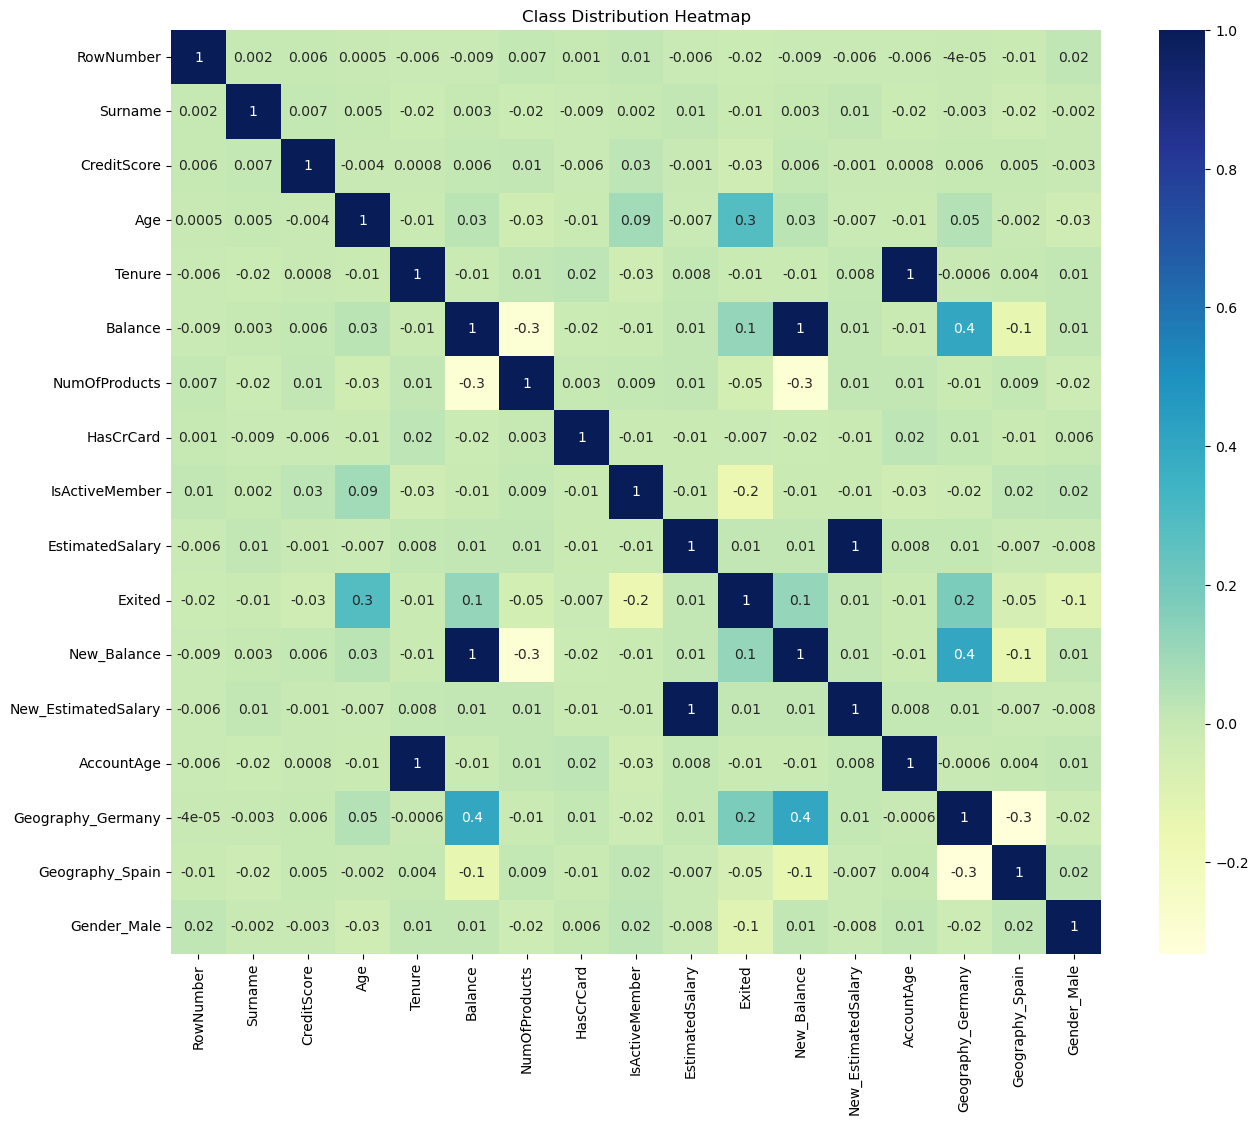

In [146]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_data, cmap='YlGnBu',annot=True,fmt='.1g')
plt.title('Class Distribution Heatmap')